# Welcome to the Normalization of The San Francisco Landings Dataset

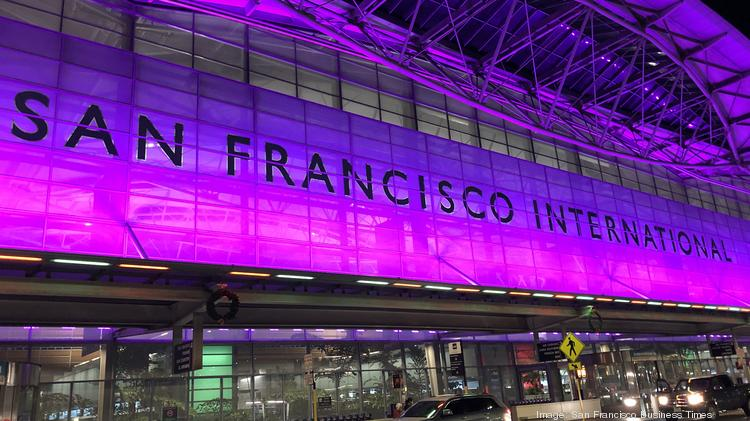

**Lets have a look at the physical model!**

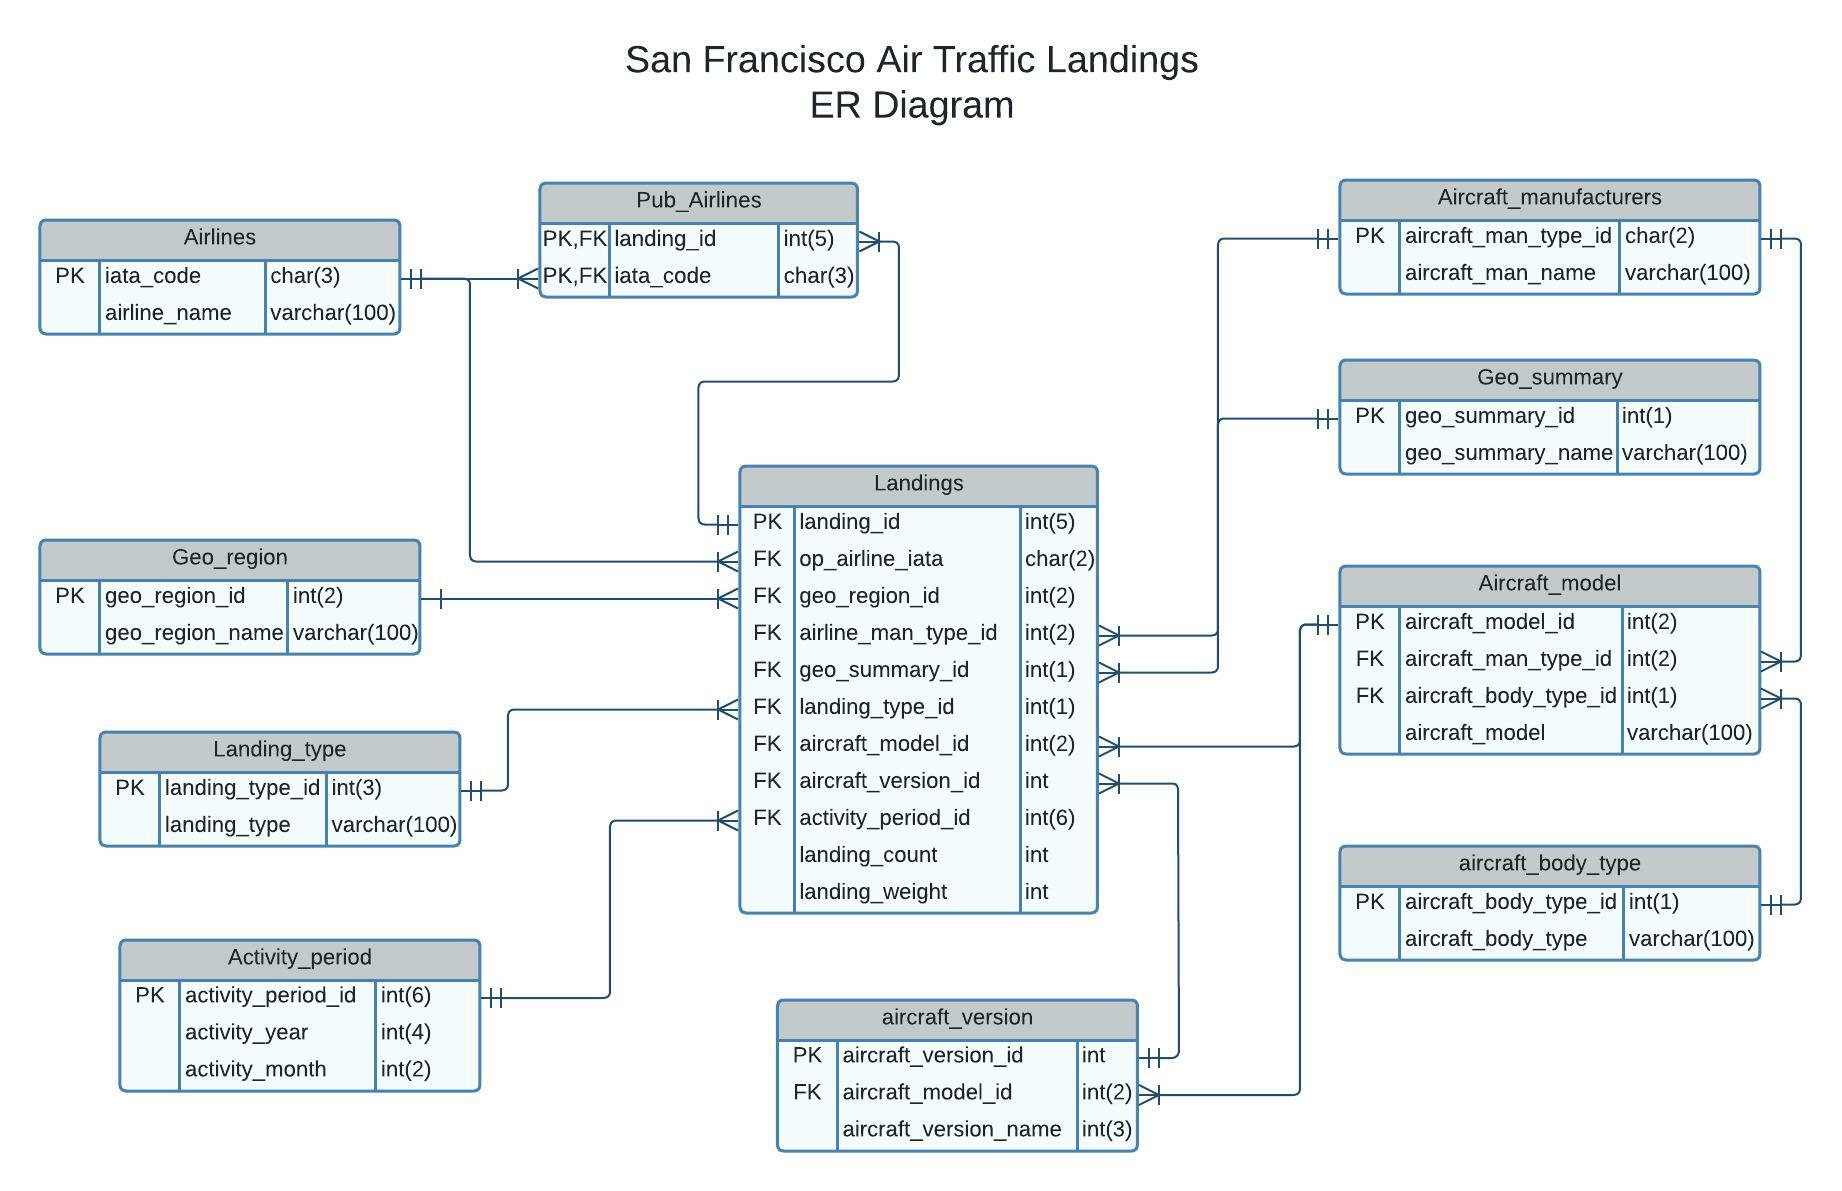

This looks like a star schema. The landings table is the fact table and the rest are the dimensions
Lets start!

## Imports

In [1]:
import pandas as pd

## Reading Data

In [2]:
air_traffic = pd.read_csv('Air_Traffic_Landings_Statistics.csv')
print(f"Number of rows:{air_traffic.shape[0]:,}\nNumber of columns:{air_traffic.shape[1]:,}")
air_traffic.head(10)

Number of rows:26,842
Number of columns:14


,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
0,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,30,40,4066000
1,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,41,1,102000
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,200,2,396000
3,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,300,167,37408000
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Wide Body,Boeing,767,333,1,320000
5,200507,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Narrow Body,Airbus,A319,114,160,21520000
6,200507,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Narrow Body,Airbus,A320,211,146,20761200
7,200507,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Narrow Body,Airbus,A321,211,2,343040
8,200507,Air China,CA,Air China,CA,International,Asia,Passenger,Wide Body,Boeing,747,400,23,14490000
9,200507,Air France,AF,Air France,AF,International,Europe,Passenger,Wide Body,Boeing,747,400,31,18855500


## Airlines Table

It seems there are rows in the data with no operating airline IATA code since it is the primary key it cannot be included in the final database and for simplicity those rows are dropped entirely. These flights were mostly operated by the aircraft manufacturers explaining the missing IATA code.

In [3]:
print(pd.DataFrame(air_traffic['Operating Airline'].unique()))

                                                    0
0                                             ABX Air
1                                        ATA Airlines
2                                          Air Canada
3                                           Air China
4                                          Air France
..                                                ...
110                                  TAP Air Portugal
111                         Norwegian Air Shuttle ASA
112                 Air Transport International, Inc.
113                                     Qatar Airways
114  Philippine Airline, Inc. (INACTIVE - DO NOT USE)

[115 rows x 1 columns]


In [6]:
no_op_iata = air_traffic[air_traffic['Operating Airline IATA Code'].isnull()]
print(no_op_iata.head(5))

      Activity Period Operating Airline Operating Airline IATA Code  \
176            200508    Boeing Company                         NaN   
2641           200703         Focus Air                         NaN   
2768           200704         Focus Air                         NaN   
6652           200909        E.A.G.L.E.                         NaN   
7741           201005         Servisair                         NaN   

     Published Airline Published Airline IATA Code    GEO Summary GEO Region  \
176     Boeing Company                         NaN  International       Asia   
2641         Focus Air                         NaN  International       Asia   
2768         Focus Air                         NaN  International       Asia   
6652        E.A.G.L.E.                         NaN       Domestic         US   
7741         Servisair                         NaN       Domestic         US   

     Landing Aircraft Type Aircraft Body Type Aircraft Manufacturer  \
176              Pass

In [8]:
#deleting the rows from the main dataframe
air_traffic.drop(no_op_iata.index,axis=0,inplace=True)

In [9]:
len(air_traffic[air_traffic['Published Airline IATA Code'].isnull()])

0

In [29]:
air_traffic['airline_diff'] = air_traffic['Operating Airline'].astype(str) + air_traffic['Operating Airline IATA Code'].astype(str)
airline_dif = air_traffic[['Operating Airline','Operating Airline IATA Code','airline_diff']]
airline_dif = airline_dif.drop_duplicates().reset_index(drop = True)
airline_dif_count = airline_dif['Operating Airline IATA Code'].value_counts()
idx = airline_dif_count[airline_dif_count>1].index
for i in idx:
    print(airline_dif[airline_dif['Operating Airline IATA Code']==i].drop(['airline_diff'],axis=1))
    print()


   Operating Airline Operating Airline IATA Code
54   Air Canada Jazz                          QK
87     Jazz Aviation                          QK

        Operating Airline Operating Airline IATA Code
28  Icelandair (Inactive)                          FI
97         Icelandair EHF                          FI

                   Operating Airline Operating Airline IATA Code
48                   United Airlines                          UA
49  United Airlines - Pre 07/01/2013                          UA



A dictionary is created to replace duplicate airline names with the same iata code

In [10]:
airline_replace = {'United Airlines - Pre 07/01/2013':'United Airlines',
                   'Northwest Airlines (became Delta)':'Northwest Airlines',
                   'Philippine Airline, Inc. (INACTIVE - DO NOT USE)':'Philippine Airline, Inc.',
                   '4T':'BBB','Icelandair EHF':'Icelandair','Icelandair (Inactive)':'Icelandair',
                   'Jazz Aviation':'Air Canada Jazz'}
air_traffic = air_traffic.replace(airline_replace)


In [11]:
airlines_pub = pd.DataFrame(air_traffic['Published Airline IATA Code'].unique()) 
airlines_pub['airline'] = pd.Series(air_traffic['Published Airline'].unique())
airlines_op = pd.DataFrame(air_traffic['Operating Airline IATA Code'].unique())
airlines_op['airline'] = pd.Series(air_traffic['Operating Airline'].unique())
airlines = pd.concat([airlines_pub,airlines_op]).drop_duplicates().reset_index(drop = True)
airlines = airlines.rename(columns = {0:'iata_code'})

Lets have a look at the normalized dataframe

In [12]:
print(airlines)

    iata_code              airline
0          GB              ABX Air
1          TZ         ATA Airlines
2          AC           Air Canada
3          CA            Air China
4          AF           Air France
..        ...                  ...
96         OO     SkyWest Airlines
97         QK      Air Canada Jazz
98         XE  ExpressJet Airlines
99         XJ      Mesaba Airlines
100        CP     Compass Airlines

[101 rows x 2 columns]


In [50]:
airlines.head(5)
#airlines.to_csv('airlines.csv',index=False)

,iata_code,airline
0,GB,ABX Air
1,TZ,ATA Airlines
2,AC,Air Canada
3,CA,Air China
4,AF,Air France


## Landing Type Table

In [61]:
land_type = pd.DataFrame(air_traffic['Landing Aircraft Type'].unique())
len_land = len(land_type)
land_type = land_type.rename(columns={0:'landing_type'})
land_type['landing_type_id'] = list(range(1,len_land+1))
land_type = land_type[['landing_type_id','landing_type']]
land_type_map = {}
for i in range(len(land_type['landing_type'])):
    land_type_map[land_type['landing_type'][i]] = i+1
print(land_type)
#land_type.to_csv('land_type.csv',index=False)

   landing_type_id landing_type
0                1    Freighter
1                2    Passenger
2                3        Combi


## Geo_Summary Table

In [21]:
geo_summary = pd.DataFrame(air_traffic['GEO Summary'].unique())
geo_summary = geo_summary.rename(columns={0:'geo_summary_name'})
geo_summary.insert(0,'geo_summary_id',list(range(1,len(geo_summary)+1)))
geo_summary_map = {}
for i in range(len(geo_summary['geo_summary_name'])):
    geo_summary_map[geo_summary['geo_summary_name'][i]] = i+1
#geo_summary.to_csv('geo_summary.csv',index=False)

In [22]:
print(pd.DataFrame(air_traffic['GEO Summary'].unique()))
print(geo_summary)

               0
0       Domestic
1  International
   geo_summary_id geo_summary_name
0               1         Domestic
1               2    International


## Geo_Region

In [24]:
regions = pd.DataFrame(air_traffic['GEO Region'].unique())
regions = regions.rename(columns={0:'geo_region_name'})
regions.insert(0,'geo_region_id',list(range(1,len(regions)+1)))
geo_region_map ={}
for i in range(len(regions['geo_region_name'])):
    geo_region_map[regions['geo_region_name'][i]] = i+1
#regions.to_csv('geo_region.csv',index=False)

In [25]:
print(regions)

   geo_region_id      geo_region_name
0              1                   US
1              2               Canada
2              3                 Asia
3              4               Europe
4              5  Australia / Oceania
5              6               Mexico
6              7      Central America
7              8          Middle East
8              9        South America
9             10            Caribbean


## Activity

In [27]:
#activity
activity = air_traffic['Activity Period'].unique()
activity = activity.rename(columns = {0:'period_id'})
activity['month']
#idx2 = activity[activity['period_id'] < 200600].index
#activity['Year'] = 0
#activity.iloc[idx2,[1]] = 2005
"""idx3 = activity[(activity['period_id'] > 200500) & (activity['period_id'] < 200700) ].index
period = list(range(200600,202300,100))
year = list(range(2006,2022,1))
for i in range(len(period)-1):
    ide = idx3 = activity[(activity['period_id'] > period[i]) & (activity['period_id'] < period[i+1]) ].index
    activity.iloc[ide,[1]] = year[i]
months = activity['period_id'].astype(str)
months = months.apply(lambda x: x[4:])
activity['month'] = months
#activity.to_csv('activity_period.csv',index=False)"""

"idx3 = activity[(activity['period_id'] > 200500) & (activity['period_id'] < 200700) ].index\nperiod = list(range(200600,202300,100))\nyear = list(range(2006,2022,1))\nfor i in range(len(period)-1):\n    ide = idx3 = activity[(activity['period_id'] > period[i]) & (activity['period_id'] < period[i+1]) ].index\n    activity.iloc[ide,[1]] = year[i]\nmonths = activity['period_id'].astype(str)\nmonths = months.apply(lambda x: x[4:])\nactivity['month'] = months\n#activity.to_csv('activity_period.csv',index=False)"

In [32]:
period = pd.DataFrame(air_traffic['Activity Period'].unique())
pd.to_datetime(period[0]).dt.to_period('m')


0      1970-01
1      1970-01
2      1970-01
3      1970-01
4      1970-01
        ...   
190    1970-01
191    1970-01
192    1970-01
193    1970-01
194    1970-01
Name: 0, Length: 195, dtype: period[M]

## Body Type

In [38]:
#Body_type
body_type = pd.DataFrame(air_traffic['Aircraft Body Type'].unique())
body_type = body_type.rename(columns={0:'aircraft_body_type'})
body_type_id = ['N-B','W-B','R-J','T-P']
body_type.insert(0,'body_type_id',body_type_id)
body_type_map = {}
for i in range(len(body_type)):
    body_type_map[body_type['aircraft_body_type'][i]] = body_type_id[i]
#body_type.to_csv('body_type.csv',index=False)

In [39]:
print(body_type)

  body_type_id aircraft_body_type
0          N-B        Narrow Body
1          W-B          Wide Body
2          R-J       Regional Jet
3          T-P         Turbo Prop


## Manufacturer

In [41]:
#Manufacturer
man = pd.DataFrame(air_traffic['Aircraft Manufacturer'].unique())
man = man.rename(columns={0:'aircraft_man_name'})
man_id = ['MD','BG','AB','ER','LJ','SG','BB','PP','LH','BV','BC','FC','SH','DH','CS']
man.insert(0,'man_id',man_id)
man_type_map = {}
for i in range(len(man)):
    man_type_map[man['aircraft_man_name'][i]] = man_id[i]
#man.to_csv('man.csv',index=False)

In [42]:
print(man)

   man_id  aircraft_man_name
0      MD  McDonnell Douglas
1      BG             Boeing
2      AB             Airbus
3      ER            Embraer
4      LJ            LearJet
5      SG         Swearingen
6      BB         Bombardier
7      PP              Piper
8      LH           Lockheed
9      BV           BAE-Avro
10     BC         Beechcraft
11     FC          Fairchild
12     SH             Shorts
13     DH        DeHavilland
14     CS             Cessna


# Models

correcting the models data was a painstaking process as I could not find a robust and all encompassing strategy for normalizing  the various model names. I had to eyeball and manually insert various different model name formats. It was painful but effective!

In [56]:
#Models
model_name = {'M90':'MD-90','MD90':'MD-90','EMB':'ERJ'}
c = air_traffic[air_traffic['Aircraft Manufacturer']=='Embraer']
correct = c['Aircraft Version'].unique()
for i in correct:
    idx2 = c[c['Aircraft Version']==i].index
    if i != '-':
        air_traffic.loc[idx2,['Aircraft Model']] = 'ERJ' + i
        air_traffic.loc[idx2,['Aircraft Version']] = 'Base'
    else:
        air_traffic.loc[idx2,['Aircraft Version']] = 'Base'



old = {'B773':['300','B777'],'B738':['800','B737'],'B789':['900','B787'],
       'B772':['200','B777'],'B739':['900','B737'],'B763':['300','B767'],
       'B788':['800','B787'],'A332':['200','A330'],'A359':['900','A350'],
       'A333':['300','A330'],'A388':['800','A380'],'B748':['8','B747'],
       'A346':['600','A340'],'B764':['400','B767'],'739':['900','B737'],
       'B742':['200','B747'],'B736':['600','737'],'A339':['900','A330'],
       'B733':['300','B737'],'B735':['500','B737'],'B752':['200','B757'],
       'A343':['300','A340'],'A306':['600','A300'],'B734':['400','B737'],
       'B753':['300','757'],'B762':['200','B767'],'B744':['400','B747'],
       '764':['400','B767'],'MD-88':['88','MD-80'],'MD83':['83','MD-80'],
       'ERJ145XR':['XR','ERJ145'],'ERJ145LR':['LR','ERJ145'],
       'ERJ145AR':['AR','ERJ145'],'E75L':['LR','E175']}
for i in old:
  idx_model = air_traffic[air_traffic['Aircraft Model'] == i].index  
  air_traffic.loc[idx_model,['Aircraft Version']] = old[i][0]
  air_traffic.loc[idx_model,['Aircraft Model']] = old[i][1]
model_names={'737':'B737','747':'B747','777':'B777','767':'B767','757':'B757',
       '787':'B787','727':'B727','717':'B717','757':'B757','M90':'MD-90'}
air_traffic = air_traffic.replace(model_names)
models = air_traffic[['Aircraft Model','Aircraft Manufacturer','Aircraft Body Type']]
models = models.drop_duplicates()
models = models.reset_index(drop = True)
#Replacing other attributes with foreign keys
models = models.replace(body_type_map)
models = models.replace(man_type_map)
models_id = list(range(1,len(models)+1))
models.insert(0,'aircraft_model_id',models_id)
model_map = {}
for i in range(len(models)):
    model_map[models['Aircraft Model'][i]] = models_id[i]
#models.to_csv('models.csv',index=False)

## Aircraft Version

In [59]:
#Assumed all empty versions are the base version
air_traffic['Aircraft Version'] = air_traffic['Aircraft Version'].fillna('Base')
version_update = {'-':'Base','0':'Base'}
air_traffic = air_traffic.replace(version_update)
air_traffic['aircraft_version_name'] = air_traffic['Aircraft Model'].astype(str) + '-' + air_traffic['Aircraft Version'].astype(str)
version = air_traffic[['Aircraft Model','Aircraft Version','aircraft_version_name']]
#version['aircraft_version_name'] = version['Aircraft Model'].astype(str) + '-' + version['Aircraft Version'].astype(str)
version = version.drop_duplicates().reset_index(drop = True)
version_id = list(range(1,len(version)+1))
version.insert(0,'aircraft_version_id',version_id)
version['Aircraft Model'] = version['Aircraft Model'].replace(model_map)
version_map = {}
for i in range(len(version)):
    version_map[version['aircraft_version_name'][i]] = version_id[i]
#version.to_csv('version.csv',index=False)

## Landings

In [64]:
#Landing
land = air_traffic[['Operating Airline IATA Code','Published Airline IATA Code','GEO Summary',
          'GEO Region','Landing Aircraft Type','Aircraft Manufacturer','Aircraft Model',
          'aircraft_version_name','Activity Period',
          'Landing Count','Total Landed Weight']]
maps = [model_map,man_type_map,version_map,geo_summary_map,geo_region_map,land_type_map]
entities = ['Aircraft Model','Aircraft Manufacturer','aircraft_version_name',
            'GEO Summary','GEO Region','Landing Aircraft Type']
for i in range(len(maps)):
    land[entities[i]] = land[entities[i]].replace(maps[i])
land_id = list(range(1000,1000+len(land)))
land.insert(0,'land_id',land_id)
land_rename = {'Operating Airline IATA Code':'op_airline_iata',
               'Published Airline IATA Code':'pub_airline_iata'}
land = land.rename(columns=land_rename)
land = land.drop('pub_airline_iata',axis=1)
#land.to_csv('landing.csv',index=False)

C:\Users\drewy\AppData\Local\Temp\ipykernel_24248\3570297660.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  land[entities[i]] = land[entities[i]].replace(maps[i])


## Codeshare

In [66]:
codeshare = {'AA':'BA','DL':'KL','KL':'AF','AF':'DL','BA':'AA','VS':'VX','VX':'VS','UA':'LH','LH':'UA'}
air_traffic['codeshare'] = ''
for i in codeshare:
    idx = air_traffic[air_traffic['Published Airline IATA Code']==i].index
    air_traffic.loc[idx,['codeshare']] = codeshare[i]
cshare = pd.DataFrame(land['land_id'].copy())
cshare['pub_airline_iata'] = air_traffic['Published Airline IATA Code'].copy()
cshare['codeshare'] = air_traffic['codeshare'].copy()
cshare2 = cshare.copy()
cshare2 = cshare2.drop('pub_airline_iata',axis=1)
cshare2 = cshare2[cshare2['codeshare']!='']
cshare2 = cshare2.rename(columns={'codeshare':'pub_airline_iata'})
cshare = cshare.drop('codeshare',axis=1)
cshare['composite_key'] = cshare['land_id'].astype(str) + cshare['pub_airline_iata'].astype(str)
cshare2['composite_key'] = cshare2['land_id'].astype(str) + cshare2['pub_airline_iata'].astype(str)
cshare_final = pd.concat([cshare,cshare2],axis=0)
cshare_final = cshare_final.sort_values(by=['land_id'])
cshare_final = cshare_final[['composite_key','land_id','pub_airline_iata']]
#cshare_final.to_csv('codeshare.csv',index=False)